In [1]:
import geopandas as gpd # https://geopandas.org/en/v0.14.4/docs/user_guide/mapping.html

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
"""FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))"""

'FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original \'naturalearth_lowres\' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.\nworld = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))'

In [3]:
# Define colors
OFF_BLACK = '#05050e'
OFF_WHITE = '#f3f1ec'
SPINE_COLOR = [0.25, 0.25, 0.35]
GRID_COLOR = [0.25] * 3
TICK_COLOR = [0.7] * 3

def set_plt_defaults(figsize=(12, 7), left=0.10, top=0.88, right=0.95, bottom=0.13, grid_on=True):
    """Set default matplotlib styling."""
    plt.rcParams.update({
        'figure.figsize': figsize,
        'figure.subplot.left': left,
        'figure.subplot.top': top,
        'figure.subplot.right': right,
        'figure.subplot.bottom': bottom,
        'text.color': OFF_BLACK,
        'axes.labelcolor': OFF_BLACK,
        'xtick.color': OFF_BLACK,
        'ytick.color': OFF_BLACK,
    })
    
    fig, ax = plt.subplots()
    
    ax.yaxis.set_ticks_position('none')  # Remove y-axis tick marks
    
    if grid_on:
        ax.grid(color=GRID_COLOR, linestyle='-', linewidth=0.85, alpha=0.15, zorder=0)
        ax.xaxis.grid() # Only display horizontal axis
    
    ax.xaxis.set_tick_params(length=5, color=TICK_COLOR)
    ax.yaxis.set_tick_params(length=0, color=TICK_COLOR)
    
    fig.set_facecolor(OFF_WHITE)
    ax.set_facecolor(OFF_WHITE)
    
    for spine in ax.spines.values():
        spine.set_color(SPINE_COLOR)
    
    return fig, ax

In [4]:
def suptitle_centered(title='Untitled Figure', y=0.96):
    plt.suptitle(title, color=[0.2] * 3, weight='semibold', size=18, y=y, ha='center')

In [5]:
def plot_validator_scatter(data, s_mod=250, marker_style = 'o', p_alpha = 0.25):
    """
    Plots layered scatter markers on longitude/latitude points.
    
    Parameters
    ----------
    tmp : pandas.DataFrame
        DataFrame that contains columns 'longitude', 'latitude', and 'log'.
    s_mod : int, optional
        A scaling factor for the marker sizes. Default is 250.
    """

    # Second layer (yellow edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color='#6c6c70', lw=8, edgecolors='w', alpha = p_alpha)

    # Third layer (white edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color='#6c6c70', lw=5, edgecolors=[0.15, 0.15, 1.0], alpha = p_alpha)

    # Final layer (no edges, red color)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=data['log'] / 4.25 * s_mod, color=[0.3, 0.3, 1.0], lw=0)


In [6]:
def plot_relay_scatter(data, s_mod=250, marker_style = 'o', p_alpha = 0.25):
    """
    Plots layered scatter markers on longitude/latitude points.
    
    Parameters
    ----------
    tmp : pandas.DataFrame
        DataFrame that contains columns 'longitude', 'latitude', and 'log'.
    s_mod : int, optional
        A scaling factor for the marker sizes. Default is 250.
    """

    # Second layer (yellow edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=s_mod, color='#6c6c70', lw=6, edgecolors=[1, 0.8, 0.8], alpha = p_alpha)

    # Third layer (white edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s= s_mod, color='#6c6c70', lw=4, edgecolors=[1, 0.5, 0.5], alpha = p_alpha)

    # Final layer (no edges, red color)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=s_mod, color=[1, 0.3, 0.3], lw=0)


In [7]:
def plot_proxy_scatter(data, s_mod=250, marker_style = 'o', p_alpha = 0.25):
    """
    Plots layered scatter markers on longitude/latitude points.
    
    Parameters
    ----------
    tmp : pandas.DataFrame
        DataFrame that contains columns 'longitude', 'latitude', and 'log'.
    s_mod : int, optional
        A scaling factor for the marker sizes. Default is 250.
    """

    # Second layer (yellow edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=s_mod, color='#6c6c70', lw=6, edgecolors=[0.8, 1.0, 0.8], alpha = p_alpha)

    # Third layer (white edges)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s= s_mod, color='#6c6c70', lw=4, edgecolors=[0.5, 1, 0.5], alpha = p_alpha)

    # Final layer (no edges, red color)
    #plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=s_mod, color='#8845ff', lw=0)
    plt.scatter(data['longitude'], data['latitude'], marker=marker_style, s=s_mod, color='#22ee22', lw=0)


In [8]:
def plot_world():
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    world.plot(ax=plt.gca(), color="lightgray", edgecolor="black", alpha=0.5)

In [9]:
df = pd.read_csv('./data/rig-validators-minimal.csv')
print('Rows:', len(df))
df.head()

Rows: 14507


,asn_organization,last_seen_date,latitude,longitude,validator_count
0,Oracle Corporation,2025-03-04 14:44:41.000 UTC,48.9,2.3,6
1,"Amazon.com, Inc.",2025-03-04 14:44:11.000 UTC,50.1,8.7,1
2,Oracle Corporation,2025-03-04 14:44:11.000 UTC,48.9,2.3,56
3,"DigitalOcean, LLC",2025-03-04 14:43:42.000 UTC,37.4,-122.0,61
4,Skoed Limited,2025-03-04 14:43:41.000 UTC,35.9,14.5,61


In [10]:
tmp = df[['latitude', 'longitude', 'validator_count']]
tmp = tmp.groupby(['latitude', 'longitude'], as_index=False)['validator_count'].sum()
tmp.sort_values(by='validator_count', ascending=False, inplace=True)
tmp['log'] = tmp['validator_count'].apply(lambda x: math.log10(x) if x > 0 else 0)
tmp.head()

,latitude,longitude,validator_count,log
1714,60.4,25.0,12814,4.107685
1540,52.4,4.9,12802,4.107278
393,35.9,14.5,10562,4.023746
547,38.9,-77.0,10150,4.006466
633,40.0,-83.0,9302,3.968576


In [11]:
locs = {
    #'aestus': ('london', 51.5072, 0.1276),
    'flashbots': ('us east', 38.9940541, -77.4524237),
    'ultrasound': ('Roubaix', 50.690102, 3.181670),
}

df = pd.DataFrame(locs).transpose()
df.rename(columns={0: 'location', 1: 'latitude', 2: 'longitude'}, inplace=True)
df.head()

,location,latitude,longitude
flashbots,us east,38.994054,-77.452424
ultrasound,Roubaix,50.690102,3.18167


In [12]:
# https://docs.bloxroute.com/bsc-and-eth/evm-blockchain-distribution-network-bdn/ips-and-relays/relays-ips
proxy_locs = {
    'singapore': ('singapore', 1.3139946,103.6794387),
    'hong-kong': ('hong-kong', 22.3523907,113.809749),
    'tokyo': ('tokyo', 35.5020595, 138.4506066),
    #'sydney': ('sydney', -33.841952, 149.6835548),
    'dublin': ('dublin', 53.3242066, -6.4105085),   
    'aws-west-1': ('santa-clara', 37.372055, -121.9596001),
    'frankfurt': ('frankfurth', 50.1210954, 8.4717586),
    'london': ('london', 51.5285262, -0.2664035)
}

proxies = pd.DataFrame(proxy_locs).transpose()
proxies.rename(columns={0: 'location', 1: 'latitude', 2: 'longitude'}, inplace=True)
proxies.head()


,location,latitude,longitude
singapore,singapore,1.313995,103.679439
hong-kong,hong-kong,22.352391,113.809749
tokyo,tokyo,35.50206,138.450607
dublin,dublin,53.324207,-6.410508
aws-west-1,santa-clara,37.372055,-121.9596


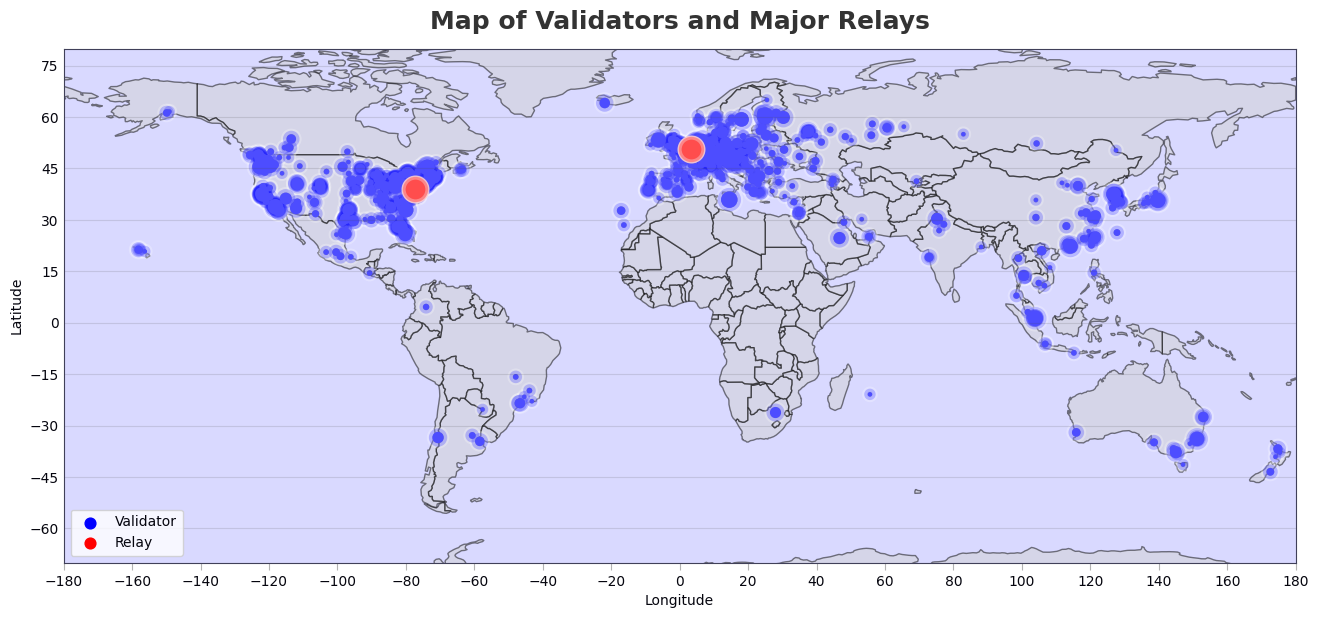

In [13]:
fig, ax = set_plt_defaults(left = 0.06, right = 0.94, top = 0.93, bottom=0.08, figsize = (14, 6.5), grid_on=True)
suptitle_centered('Map of Validators and Major Relays')
plot_world()


plot_validator_scatter(tmp, s_mod=150, p_alpha=0.25)
plot_relay_scatter(df, s_mod=200, p_alpha=0.9)

ax.set_facecolor([0.85, 0.85, 1]) # water
fig.set_facecolor([1, 1, 1])

plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'b', label = 'Validator')
plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'r', label = 'Relay')
plt.legend(loc = 'lower left')

plt.gca().set_xticks(np.arange(-180, 181, 20))
plt.gca().set_yticks(np.arange(-90, 91, 15))
plt.xlim([-180, 180])
plt.ylim([-70, 80])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('./outputs/relay-world-map.png', dpi=150, transparent=False,  facecolor=fig.get_facecolor())
plt.show()

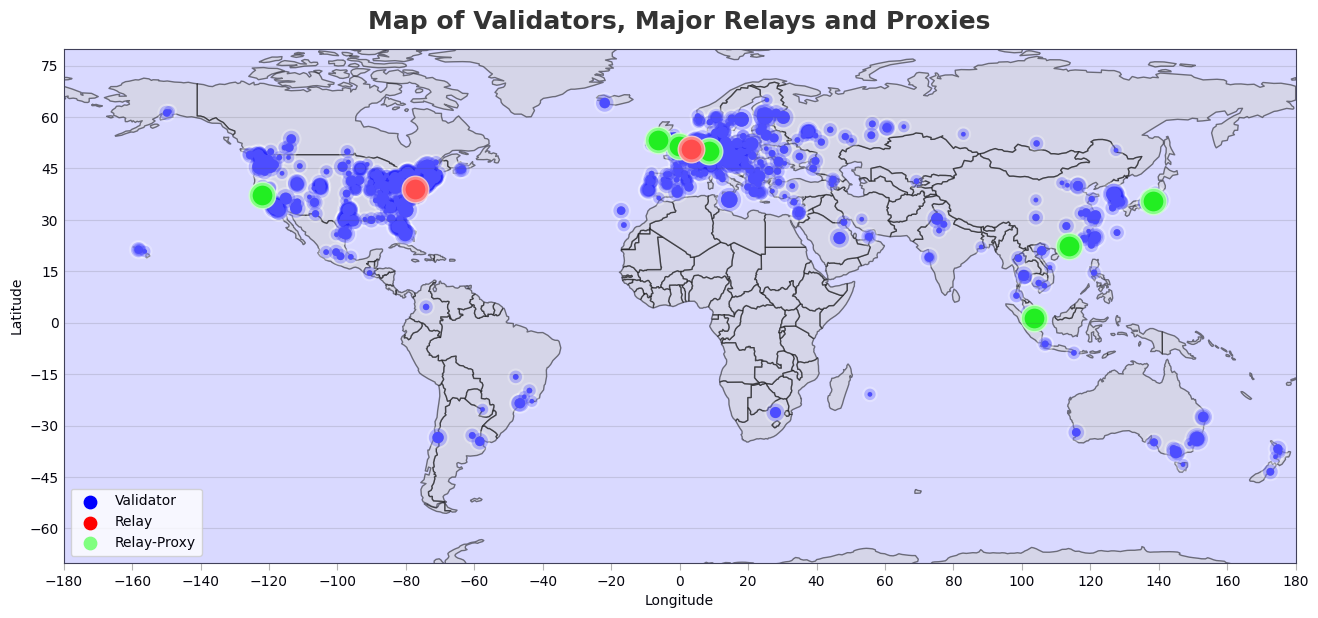

In [14]:
fig, ax = set_plt_defaults(left = 0.06, right = 0.94, top = 0.93, bottom=0.08, figsize = (14, 6.5), grid_on=True)
suptitle_centered('Map of Validators, Major Relays and Proxies')
plot_world()


plot_validator_scatter(tmp, s_mod=150, p_alpha=0.25)
plot_proxy_scatter(proxies, s_mod=200, p_alpha=0.9)
plot_relay_scatter(df, s_mod=200, p_alpha=0.9)

ax.set_facecolor([0.85, 0.85, 1]) # water
fig.set_facecolor([1, 1, 1])

plt.scatter([-5000], [-5000], marker='o', s = 80, color = 'b', label = 'Validator')
plt.scatter([-5000], [-5000], marker='o', s = 80, color = 'r', label = 'Relay')
plt.scatter([-5000], [-5000], marker='o', s = 80, color = [0.5, 1, 0.5], label = 'Relay-Proxy')
plt.legend(loc = 'lower left')

plt.gca().set_xticks(np.arange(-180, 181, 20))
plt.gca().set_yticks(np.arange(-90, 91, 15))
plt.xlim([-180, 180])
plt.ylim([-70, 80])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('./outputs/relay-and-proxies-world-map.png', dpi=150, transparent=False,  facecolor=fig.get_facecolor())
plt.show()

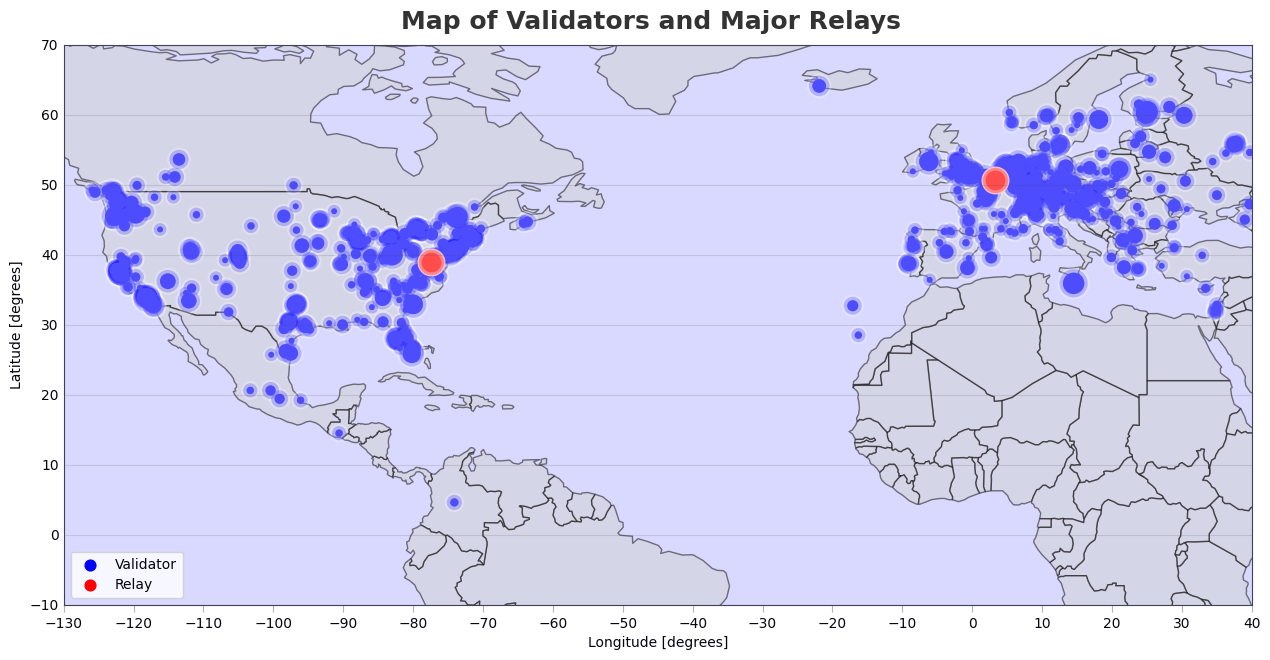

In [15]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 0.91, bottom=0.11, figsize = (14, 7), grid_on=True)
suptitle_centered('Map of Validators and Major Relays')
plot_world()

plot_validator_scatter(tmp, s_mod=250, p_alpha=0.25)
plot_relay_scatter(df, s_mod=200, p_alpha=0.9)

plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'b', label = 'Validator')
plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'r', label = 'Relay')

ax.set_facecolor([0.85, 0.85, 1]) # water
#ax.set_facecolor([1, 1, 1])
fig.set_facecolor([1, 1, 1])
ax.set_xticks(np.arange(-130, 41, 10))
plt.xlim([-130, 40])
plt.ylim([-10, 70])
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.legend(loc = 'lower left')
plt.savefig('./outputs/relay-zoom-map.png', dpi=150, transparent=False, facecolor=fig.get_facecolor())
plt.show()

In [16]:
df

,location,latitude,longitude
flashbots,us east,38.994054,-77.452424
ultrasound,Roubaix,50.690102,3.18167


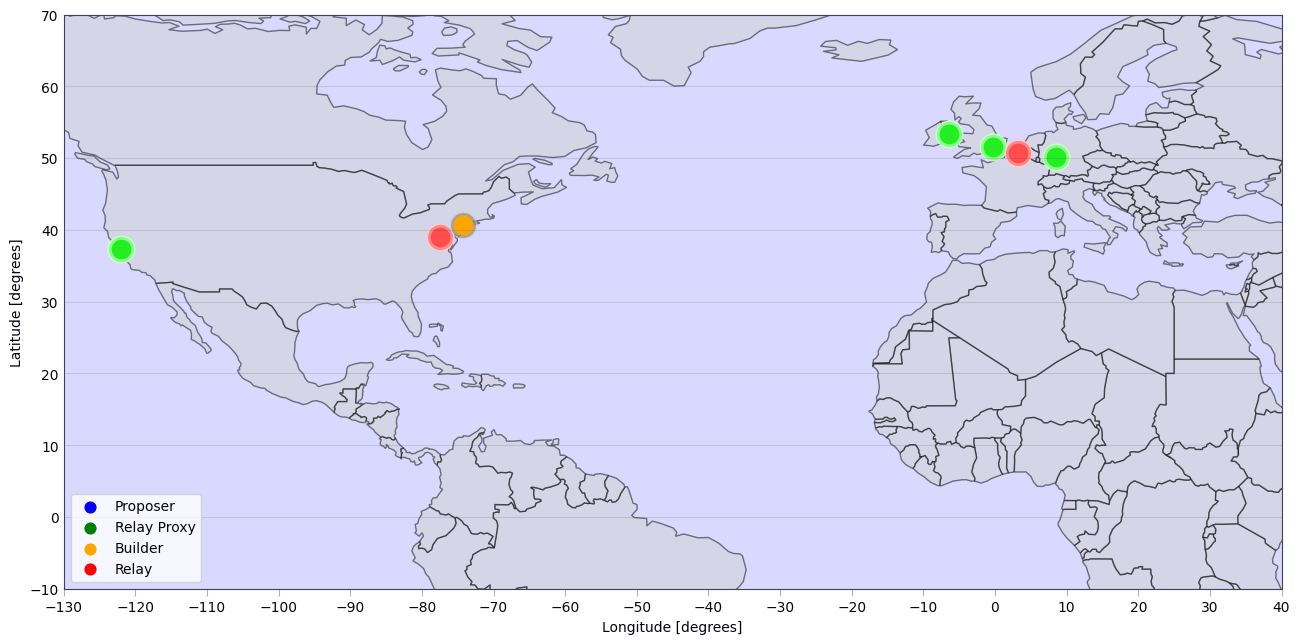

In [17]:
def plot_proposer_scatter_2(x, y, s_mod=250, marker_style = 'o', p_alpha = 0.25):
    # Second layer (yellow edges)
    plt.scatter(x, y, marker=marker_style, s=s_mod, color='#6c6c70', lw=8, edgecolors='w', alpha = p_alpha)

    # Third layer (white edges)
    plt.scatter(x, y, marker=marker_style, s=s_mod, color='#6c6c70', lw=5, edgecolors=[0.35, 0.35, 1.0], alpha = p_alpha)

    # Final layer (no edges, red color)
    plt.scatter(x, y, marker=marker_style, s=s_mod, color=[0.5, 0.5, 1.0], lw=0)

def plot_builder_scatter_2(x, y, s_mod=250, marker_style = 'o', p_alpha = 0.25):
    # Second layer (yellow edges)
    plt.scatter(x, y, marker=marker_style, s=s_mod, color='#cccccc', lw=6, edgecolors=[0.8, 0.8, 1.0], alpha = p_alpha)

    # Third layer (white edges)
    plt.scatter(x, y, marker=marker_style, s= s_mod, color='#eeccaa', lw=4, edgecolors=[0.5, 0.5, 0.1], alpha = p_alpha)

    # Final layer (no edges, red color)
    plt.scatter(x, y, marker=marker_style, s=s_mod, color='#FFA500', lw=0)



fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 0.93, bottom=0.11, figsize = (18, 7), grid_on=True)
#suptitle_centered('Block Builder Geographic Control Flow')
plot_world()

42.9836424,140.6241811
plot_proposer_scatter_2(x = 141.5938, y = 43.1976, s_mod=250, p_alpha=0.25) # sapporo japan
plot_proxy_scatter(proxies, s_mod=200, p_alpha=0.9)
plot_relay_scatter(df, s_mod=200, p_alpha=0.9)
plot_builder_scatter_2(x=-74.3091446, y=40.6966727, s_mod=200, p_alpha=0.5)
#plot_builder_scatter_2(x=2.0576175, y=41.3926, s_mod=200, p_alpha=0.5) # spain



plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'b', label = 'Proposer')
plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'g', label = 'Relay Proxy')
plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'orange', label = 'Builder')
plt.scatter([-5000], [-5000], marker='o', s = 60, color = 'r', label = 'Relay')


ax.set_facecolor([0.85, 0.85, 1]) # water
#ax.set_facecolor([1, 1, 1])
fig.set_facecolor([1, 1, 1])
ax.set_xticks(np.arange(-130, 41, 10))
plt.xlim([-130, 40])
plt.ylim([-10, 70])
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.legend(loc = 'lower left')

"""
ax.set_facecolor([0.85, 0.85, 1]) # water
#ax.set_facecolor([1, 1, 1])
fig.set_facecolor([1, 1, 1])
ax.set_xticks(np.arange(-180, 181, 10))
plt.xlim([-180, 180])
plt.ylim([-50, 80])
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.legend(loc = 'lower center')
"""
plt.savefig('./outputs/relay-zoom-map-no-validators-proxies.png', dpi=150, transparent=False, facecolor=fig.get_facecolor())
plt.show()

NameError: name 'plot_custom_scatter' is not defined

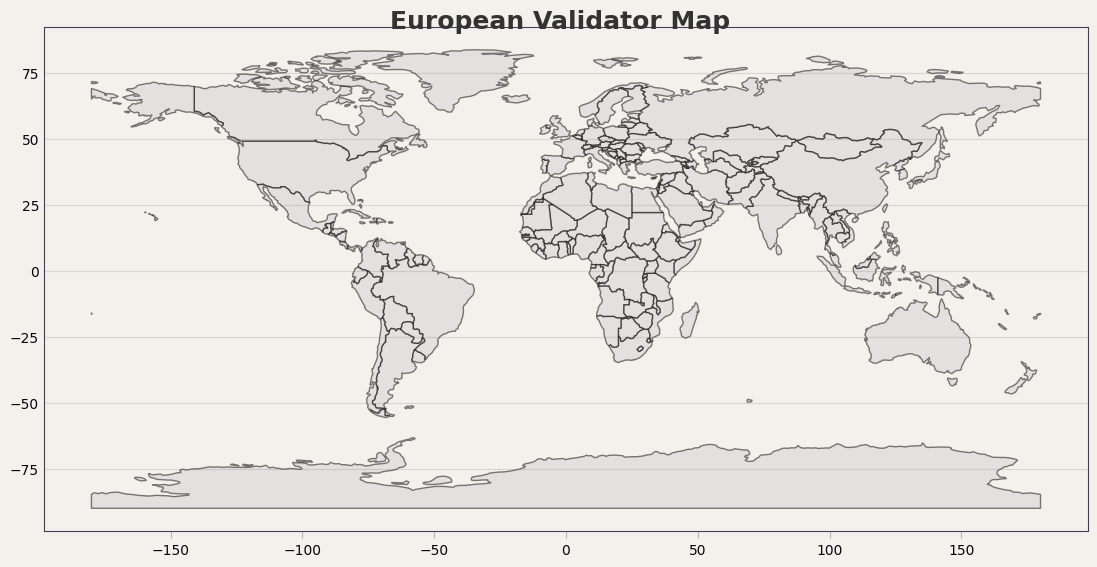

In [18]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 1.1, bottom=-0.08, figsize = (12, 6), grid_on=True)
suptitle_centered('European Validator Map')
plot_world()
plot_custom_scatter(tmp, s_mod=400)

plt.xlim([-20, 50])
plt.ylim([35, 65])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('./outputs/rig-map-europe.png', dpi=150, transparent=False, facecolor=ax.get_facecolor())
plt.show()

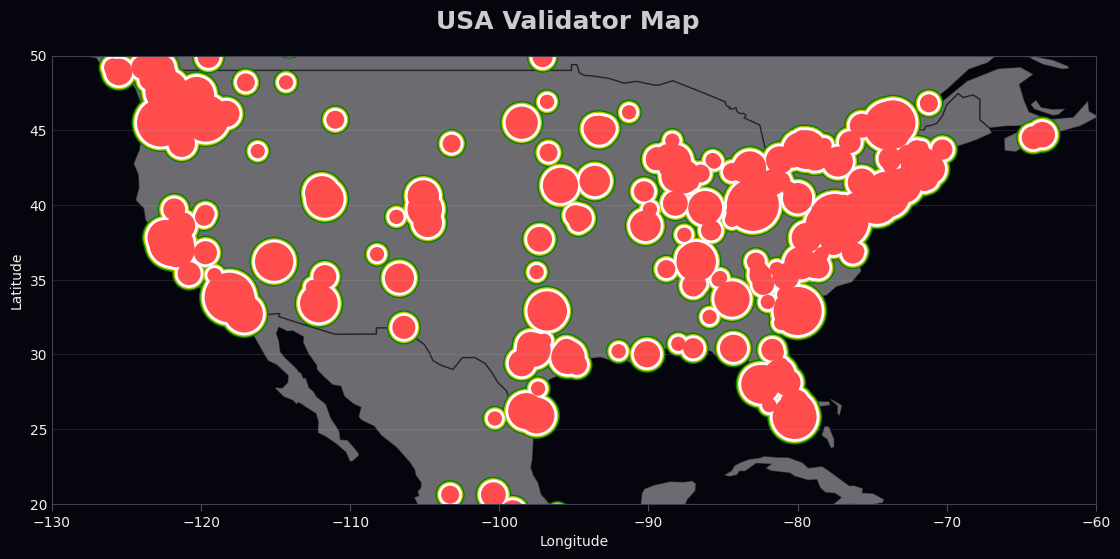

In [ ]:
fig, ax = set_plt_defaults(left = 0.07, right = 0.94, top = 1.1, bottom=-0.08, figsize = (12, 6), grid_on=True)
suptitle_centered('USA Validator Map')
plot_world()
plot_custom_scatter(tmp, s_mod=1500)

plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('./outputs/rig-map-usa.png', dpi=150, transparent=False, facecolor=ax.get_facecolor())
plt.show()